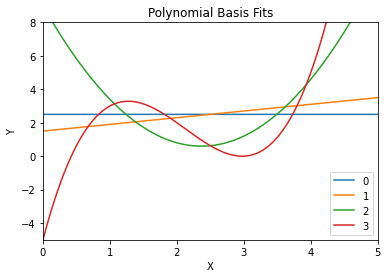

                 MSE
degree              
0       3.250000e+00
1       3.050000e+00
2       8.000000e-01
3       3.494294e-23


<Figure size 432x288 with 0 Axes>

In [34]:
# Import packages
import os
import math
import numpy as np
import matplotlib.pyplot as plt



def get_data():
    '''
    ------------------------
    Input: None
    Output: Assignment data
    ------------------------
    '''
    return np.array([1, 2, 3, 4]), np.array([3, 2, 0, 5])  


def get_basis(x, k):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Polynomial basis features
    ------------------------
    '''
    grid = np.meshgrid(x, np.arange(k + 1)) 
    return np.power(grid[0], grid[1]).T


def get_sol(phi_x, y):
    '''
    ------------------------
    Input: Polynomial features
    Output: Least squares solution
    ------------------------
    '''
    return np.linalg.inv(phi_x.T @ phi_x) @ phi_x.T @ y


def get_predictions(phi_x, beta_hat):
    '''
    ------------------------
    Input: 
           1) Polynomial features
           2) Least squares coefficients
    Output: Predictions
    ------------------------
    '''
    return phi_x @ beta_hat


def get_mse(y, y_hat):
    '''
    ------------------------
    Input: True values and predicted values
    Output: Mean squared error
    ------------------------
    '''
    return 1/max(y.shape)*np.sum(np.power(y-y_hat, 2))



def plot_results(path, title, k, results):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    # Make grids for plot
    x_grid = np.linspace(-5, 5, 100000)
    x_basis = [get_basis(x_grid, degree) for degree in range(k + 1)]
    y_grid = [get_predictions(basis, results[deg]['beta_hat']) for basis, deg in zip(x_basis, range(k + 1))]
    
    # Plots
    for degree in range(k + 1):
        plt.plot(x_grid, y_grid[degree], label = str(degree))
    
    # Add annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([-5,8])

    
    # Display and save plot
    plt.show()
    plt.savefig(path)


def run_regression(k, x, y, loss_func):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    phi_x = get_basis(x, k)
    beta_hat = get_sol(phi_x, y)
    y_hat = get_predictions(phi_x, beta_hat)
    
    mse = loss_func(y, y_hat)
    results = {'beta_hat': beta_hat, 'y_hat': y_hat, 'mse': mse, 'degree': k}
    
    return(results)


def get_final_results_df(results):
    
    mse = pd.DataFrame([result['mse'] for result in results], columns = ['MSE'])
    mse['degree'] = [result['degree'] for result in results]
    mse.set_index('degree', inplace = True)
    
    return(mse)


def main(k):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    title = 'Polynomial Basis Fits'
    path = os.path.join('.', '..', 'figs', '1_1.png')
    
    x, y = get_data()
    
    results = [run_regression(degree, x, y, get_mse) for degree in range(k + 1)]
    plot_results(path, title, k, results)
    df = get_final_results_df(results)
    
    return(df)



if __name__ == '__main__':

    mse = main(k = 3)
    print(mse)

In [ ]:
# Import packages
def get_noisy_basis(x, loc = 0, var = 0.007): 
    '''
    ---------------------
    Input:
    Output: 
    ---------------------
    '''
    return np.sin(2*math.pi*x)**2 + np.random.normal(0, np.sqrt(var))

In [ ]:
def get_true_basis(x):
    '''
    ---------------------
    Input:
    Output: 
    ---------------------
    '''
    return np.sin(2*math.pi*x)**2

In [ ]:
def get_data(n, lower, upper, var):
    '''
    ---------------------
    Input:
    Output: 
    ---------------------
    '''
    np.random.seed(1299)
    x = np.random.uniform(lower, upper, n)
    y_true = np.array([get_true_basis(example) for example in x])
    y = np.array([get_noisy_basis(example, var) for example in x])
    
    return x, y_true, y

In [ ]:
def plot_data(x, y_hat, path):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    # Close any figures currently open
    plt.clf()

    # Make grids of x and y points to plot
    x_grid = np.linspace(0, 5, 1000000)
    y_grid = np.array([get_true_basis(example) for example in x_grid])

    # Title of the plot
    title = "True basis function vs. Noisy data points"

    # Plot the true curve
    plt.plot(x_grid, y_grid, label = "True function")
    plt.plot(x, y_hat, "ro", )
    
    # Add annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    
    
    axes = plt.gca()
    axes.set_xlim([0,1.6])
    axes.set_ylim([0,1.6])

    
    # Display and save plot
    plt.savefig(path)

In [ ]:
def get_ln_mse(y, y_hat, tolerance=1e-18):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    return np.log(np.sum((y-y_hat)**2)/max(y.shape))

In [ ]:
def run_polynomial_regression(x, y, lower = 1, upper = 18):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    results = np.array([run_regression(k, x, y, get_ln_mse) for k in range(lower, upper)])
    ln_mse = np.array([result['mse'] for result in results])
    
    return results, ln_mse

In [143]:
def plot_loss(losses, highest_k, path):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    # Close any currently open plots
    plt.clf()

    # Title of the plot
    title = "Polynomial degree vs. training error"

    # Make grids of x and y points to plot
    x_grid = np.arange(1, highest_k)
    
    # Plot the true curve
    plt.plot(x_grid, losses, "r.")
    
    # Add annotations
    plt.xlabel('Polynomial degree')
    plt.ylabel('Log MSE')
    plt.title(title)
    
    # Get current access
    axes = plt.gca()
    axes.set_xlim([0,20])
    axes.set_ylim([min(losses) - 0.1, max(losses) + 0.1])

    
    # Display and save plot
    plt.savefig(path)

[-2.08994699 -2.12232889 -2.14051882 -2.96367174 -2.96949786 -5.42677271
 -5.73737157 -5.89476041 -5.92607181 -5.95316894 -5.77032675 -5.46621531
 -4.89170269 -5.48170156 -5.91412278 -4.71186687 -0.15880257]


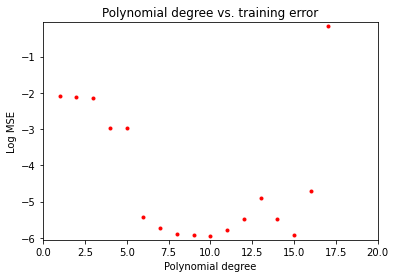

In [144]:
def main():
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    '''
    # Get and plot initial data
    x, y_true, y = get_data(30, 0, 1, 0.07)
    plot_data(x, y, os.path.join("..", "figs", '1_2_data.png'))
    
    # Run regressions
    lower = 1 
    upper = 18
    
    # Get results
    results, ln_mse = run_polynomial_regression(x, y, lower, upper) 
    print("The log MSE for each regression is:" : ln_mse)

    # Plot training loss
    plot_loss(ln_mse, upper, os.path.join("..", "figs", '1_2_training_loss.png'))

In [146]:
def get_testing_data(n, lower, upper, var):
    '''
    ---------------------
    Input: Parameters needed for data
    Output: output
    ---------------------
    '''
    np.random.seed(181290)
    x = np.random.uniform(lower, upper, n)
    y_true = np.array([get_true_basis(example) for example in x])
    y = np.array([get_noisy_basis(example, var) for example in x])
    
    return x, y_true, y

In [145]:
def get_test_mse(x_test, y_test_true, results, k = 17):
    '''
    ---------------------
    Input: Parameters needed for data
    Output: output
    ---------------------
    '''
    # Get features
    x_basis = [get_basis(x_test, degree) for degree in range(1, k + 1)]
    
    # Get predictions
    y_preds = [get_predictions(basis, results[deg]['beta_hat']) for basis, deg in zip(x_basis, range(k + 1))]
    
    # Get log mean squared error
    ln_mse_test = [get_ln_mse(y_test_true, y_pred) for y_pred in y_preds]
    
    return(ln_mse_test)

In [102]:
n = 1000
lower = 0
upper = 1
sigma = 0.07
x_test, y_test_true, y_test = get_data(1000, 0, 1, 0.07)